# Classification

In [871]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd

In [872]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Classification problem types
1. Binary ->classify to binary classes (0 or 1)
2. Multiclass -> classify target to one in multiple classes (recognition)
3. Multi label -> classify target to one or more in multiple classes (taggings)

Classification Architecture
1. Input layer
    - Shape -> same as  number of features
2. Hidden layers
    - activation function -> Usually ReLU
    - Layer count -> 1 to idk
    - Neuron count ->10 to 512
3. Output Layer
    - activation function
    - Shape -> either 1 for binary or 1 per class
4. Loss function
    - Binary crossentropy
    - Cross entropy 
5. Optimizer
    - SGD or Adam

In [873]:

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.07, # a little bit of noise to the dots
                    random_state=42)


print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")


First 5 X features:
[[ 0.7301675   0.26189078]
 [-0.71190572  0.1841244 ]
 [-0.8443255   0.27063595]
 [-0.46454046  0.65157761]
 [ 0.44899682 -0.89314768]]

First 5 y labels:
[1 1 1 1 0]


In [874]:
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.730168,0.261891,1
1,-0.711906,0.184124,1
2,-0.844325,0.270636,1
3,-0.464540,0.651578,1
4,0.448997,-0.893148,0
5,-0.460125,0.739640,1
6,-0.018442,0.807898,1
7,0.747733,0.171293,1
8,-0.182061,-0.806218,1
9,-0.099746,1.062906,0


In [875]:
# check circle labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

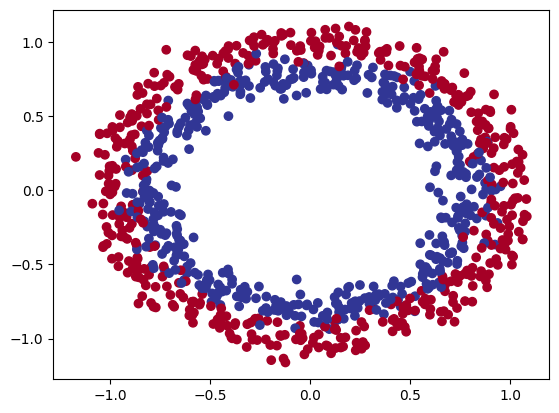

In [876]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [877]:

X.shape, y.shape

((1000, 2), (1000,))

The second dimension for X means it has two features while y has only one

But why? the tensor X is in the shape of a coordinate so it has x and y dimensions!

While the y is only labels!

in the following, it gets more clear

In [878]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
# Look! X has 2 coordinate dims and y is the labels
X[:5], y[:5]

(tensor([[ 0.7302,  0.2619],
         [-0.7119,  0.1841],
         [-0.8443,  0.2706],
         [-0.4645,  0.6516],
         [ 0.4490, -0.8931]]),
 tensor([1., 1., 1., 1., 0.]))

In [879]:
from sklearn.model_selection import train_test_split
# sklearn provides better methods for train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [880]:
X=X.to(device)
y=y.to(device)
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

In [881]:
def PlotLoss(epochs, Trloss, Teloss):
    plt.scatter(epochs, Trloss, c="b", s=4, label="Training Loss")
    plt.scatter(epochs, Teloss, c="g", s=4, label="Testing Loss")
    # plt.xlim(0, ma4

    plt.legend(prop={"size": 1})

In [882]:
class CircleModel(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer1=torch.nn.Linear(2,5)
        self.layer2=torch.nn.Linear(5,1)
    def forward(self, x):
        return self.layer2(self.layer1(x))
    



In [883]:
model_0 = CircleModel().to(device)
model_0

CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [884]:
# instead of doing it recursively(yuck) we can do it better like so
model_0=torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=5),
    torch.nn.Linear(in_features=5, out_features=5),
    torch.nn.Linear(in_features=5, out_features=1)
)
model_0.to(device=device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=5, bias=True)
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [885]:
# Initial prediction
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1073],
        [-0.1265],
        [-0.1726],
        [-0.0862],
        [-0.3272],
        [-0.3365],
        [-0.2418],
        [-0.2880],
        [-0.1781],
        [-0.1173]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Loss function
Since this is binary, we want to implement binary cross entropy
1. Binary Cross Entropy
2. Binary Cross Entropy with logits(uses a sigmoid layer)

In [886]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = torch.nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

## Metrics


In [887]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# calculate recall
def recall_fn(y_true, y_pred):
    # tp = tp/fn
    true_positives = (y_pred * y_true).sum().float()
    actual_positives = y_true.sum().float()
    recall = true_positives / (actual_positives + 1e-8)
    return recall

# calculate precision
def precision_fn(y_true, y_pred):
    true_positives = (y_pred * y_true).sum().float()
    predicted_positives = y_pred.sum().float()
    precision = true_positives / (predicted_positives + 1e-8)  # Avoid division by zero
    return precision

The raw output of a forward pass without training is called logits

In [888]:

# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.1073],
        [-0.1265],
        [-0.1726],
        [-0.0862],
        [-0.3272]], grad_fn=<SliceBackward0>)

In [889]:

# Use sigmoid on model logits
# this way, its squeezed between 0 and 1
# If y_pred_probs >= 0.5, y=1 (class 1)
# If y_pred_probs < 0.5, y=0 (class 0)

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4732],
        [0.4684],
        [0.4570],
        [0.4785],
        [0.4189]], grad_fn=<SigmoidBackward0>)

In [890]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
print(y_preds.squeeze())
print(y_test[:5])


tensor([True, True, True, True, True])
tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)
tensor([1., 0., 1., 0., 1.])


In [891]:
# torch.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

train_loss_values:int=[]
test_loss_values=[]
epoch_count =[]

def train(model: torch.nn.Sequential):
    for epoch in range(epochs):
        model.train()

        # 1. Forward pass
        y_logits = model(X_train).squeeze() 
        # 
        # turn logits -> pred probs -> pred labls
        y_pred = torch.round(torch.sigmoid(y_logits)) 
    
        # 2. Calculate loss
        loss = loss_fn(y_logits,
                    y_train) 
        acc = accuracy_fn(y_true=y_train, 
                        y_pred=y_pred) 
        # 3. Zero grad
        optimizer.zero_grad()
        # 4. Backprop
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        # set evaluation
        model.eval()
        with torch.inference_mode():
            # forward pass after optimized
            test_logits = model(X_test).squeeze() 
            # calculate the 0 and 1 thing
            test_pred = torch.round(torch.sigmoid(test_logits))
            # calculate loss and acc after optimized
            test_loss = loss_fn(test_logits,
                                y_test)
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)
            epoch_count.append(epoch)
            train_loss_values.append(loss.cpu().detach().numpy())
            test_loss_values.append(test_loss.cpu().detach().numpy()) 
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [892]:
train(model_0)

Epoch: 0 | Loss: 0.69926, Accuracy: 50.00% | Test loss: 0.69979, Test acc: 50.00%
Epoch: 10 | Loss: 0.69568, Accuracy: 45.88% | Test loss: 0.69686, Test acc: 45.00%
Epoch: 20 | Loss: 0.69431, Accuracy: 47.75% | Test loss: 0.69585, Test acc: 42.00%
Epoch: 30 | Loss: 0.69376, Accuracy: 48.50% | Test loss: 0.69554, Test acc: 49.50%
Epoch: 40 | Loss: 0.69353, Accuracy: 48.62% | Test loss: 0.69547, Test acc: 50.50%
Epoch: 50 | Loss: 0.69342, Accuracy: 49.50% | Test loss: 0.69549, Test acc: 50.00%
Epoch: 60 | Loss: 0.69336, Accuracy: 50.12% | Test loss: 0.69553, Test acc: 48.50%
Epoch: 70 | Loss: 0.69333, Accuracy: 50.25% | Test loss: 0.69557, Test acc: 48.50%
Epoch: 80 | Loss: 0.69330, Accuracy: 50.75% | Test loss: 0.69561, Test acc: 48.50%
Epoch: 90 | Loss: 0.69328, Accuracy: 50.62% | Test loss: 0.69564, Test acc: 47.50%
Epoch: 100 | Loss: 0.69326, Accuracy: 50.75% | Test loss: 0.69566, Test acc: 47.00%
Epoch: 110 | Loss: 0.69324, Accuracy: 50.62% | Test loss: 0.69568, Test acc: 47.00%
Epo

In [893]:
print(len(train_loss_values))
# print(torch.Tensor(train_loss_values))
# print(len(test_loss_values))
print(epochs)

1000
1000


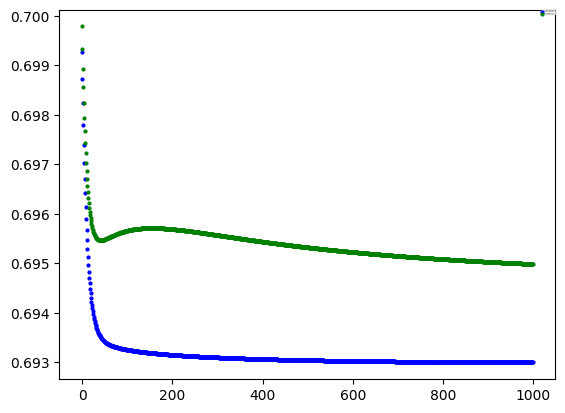

In [894]:
PlotLoss(epoch_count, train_loss_values, test_loss_values)

So far our neural networks have only been using linear (straight) line functions.

But the data we've been working with is non-linear (circles).

pytorch has a couple and one of which is ReLu


In [895]:
model_1=torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=10),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=10, out_features=10),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=10, out_features=1),
    torch.nn.ReLU(),
)
model_1.to(device=device)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): ReLU()
)

In [896]:
epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
train_loss_values:int=[]
test_loss_values=[]
epoch_count =[]

In [897]:
loss_fn = torch.nn.BCEWithLogitsLoss()
# redefine optimizer and loss because it is tied to a model
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [898]:
def train(model: torch.nn.Sequential):
    for epoch in range(epochs):
        model.train()

        # 1. Forward pass
        y_logits = model(X_train).squeeze() 
        # 
        # turn logits -> pred probs -> pred labls
        y_pred = torch.round(torch.sigmoid(y_logits)) 
    
        # 2. Calculate loss
        loss = loss_fn(y_logits,
                    y_train) 
        acc = accuracy_fn(y_true=y_train, 
                        y_pred=y_pred) 
        # 3. Zero grad
        optimizer.zero_grad()
        # 4. Backprop
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        # set evaluation
        model.eval()
        with torch.inference_mode():
            # forward pass after optimized
            test_logits = model(X_test).squeeze() 
            # calculate the 0 and 1 thing
            test_pred = torch.round(torch.sigmoid(test_logits))
            # calculate loss and acc after optimized
            test_loss = loss_fn(test_logits,
                                y_test)
            test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)
            epoch_count.append(epoch)
            train_loss_values.append(loss.cpu().detach().numpy())
            test_loss_values.append(test_loss.cpu().detach().numpy()) 
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

In [899]:
train(model_1)

Epoch: 0 | Loss: 0.69254, Accuracy: 50.00% | Test loss: 0.69303, Test acc: 50.00%
Epoch: 10 | Loss: 0.69213, Accuracy: 50.00% | Test loss: 0.69267, Test acc: 50.00%
Epoch: 20 | Loss: 0.69192, Accuracy: 51.62% | Test loss: 0.69251, Test acc: 51.00%
Epoch: 30 | Loss: 0.69178, Accuracy: 51.50% | Test loss: 0.69244, Test acc: 51.50%
Epoch: 40 | Loss: 0.69164, Accuracy: 51.62% | Test loss: 0.69237, Test acc: 51.00%
Epoch: 50 | Loss: 0.69150, Accuracy: 51.62% | Test loss: 0.69230, Test acc: 51.00%
Epoch: 60 | Loss: 0.69136, Accuracy: 51.75% | Test loss: 0.69224, Test acc: 51.00%
Epoch: 70 | Loss: 0.69121, Accuracy: 51.50% | Test loss: 0.69217, Test acc: 51.00%
Epoch: 80 | Loss: 0.69107, Accuracy: 51.25% | Test loss: 0.69210, Test acc: 51.00%
Epoch: 90 | Loss: 0.69093, Accuracy: 51.38% | Test loss: 0.69203, Test acc: 51.00%
Epoch: 100 | Loss: 0.69079, Accuracy: 51.38% | Test loss: 0.69195, Test acc: 51.00%
Epoch: 110 | Loss: 0.69066, Accuracy: 51.50% | Test loss: 0.69188, Test acc: 51.00%
Epo

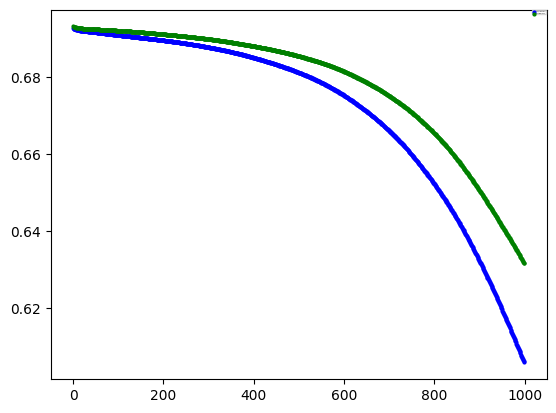

In [900]:
PlotLoss(epoch_count, train_loss_values,test_loss_values)

In [901]:
from helper_functions import plot_predictions, plot_decision_boundary

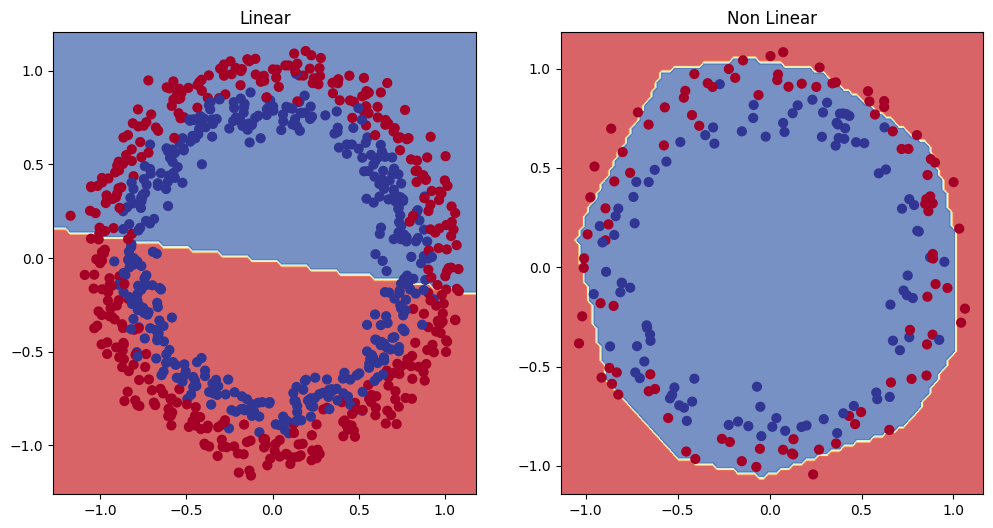

In [902]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Linear")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Non Linear")
plot_decision_boundary(model_1, X_test, y_test)